In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from google.colab import files

In [3]:
uploaded = files.upload()

Saving AMZN_1Y_Historical_Data.csv to AMZN_1Y_Historical_Data.csv


In [6]:
from os import rename
amzn_df = pd.read_csv('AMZN_1Y_Historical_Data.csv')

amzn_df = amzn_df.rename(columns={'Close/Last' : 'Close_price'})

columns_to_process = ['Close_price','Open','High','Low']

for col in columns_to_process:
  amzn_df[col] = amzn_df[col].str.replace('$','').astype(float)

amzn_df.head(5)

<ipython-input-6-8cc312b7b660>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amzn_df[col] = amzn_df[col].str.replace('$','').astype(float)


,Date,Close_price,Volume,Open,High,Low
0,10/23/2023,126.56,48259950,124.630,127.8800,123.98
1,10/20/2023,125.17,56406410,128.050,128.1700,124.97
2,10/19/2023,128.40,60961360,130.565,132.2400,127.47
3,10/18/2023,128.13,42699480,129.900,130.6699,127.51
4,10/17/2023,131.47,49344550,130.390,132.5800,128.71


In [7]:
from scipy.sparse import random
df_close_price = amzn_df[['Close_price']]

future_days = 15
df_close_price['Prediction'] = df_close_price[['Close_price']].shift(-future_days)
X = np.array(df_close_price.drop(['Prediction'], 1))[:-future_days]
y = np.array(df_close_price['Prediction'])[:-future_days]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)



<ipython-input-7-e8436f822da0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close_price['Prediction'] = df_close_price[['Close_price']].shift(-future_days)
<ipython-input-7-e8436f822da0>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_close_price.drop(['Prediction'], 1))[:-future_days]


LinearRegression()

In [8]:
x_future = df_close_price.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future
lr_prediction = regression_model.predict(x_future)


<ipython-input-8-4a6bdf325d14>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df_close_price.drop(['Prediction'], 1)[:-future_days]


<ipython-input-16-d35b9e907679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


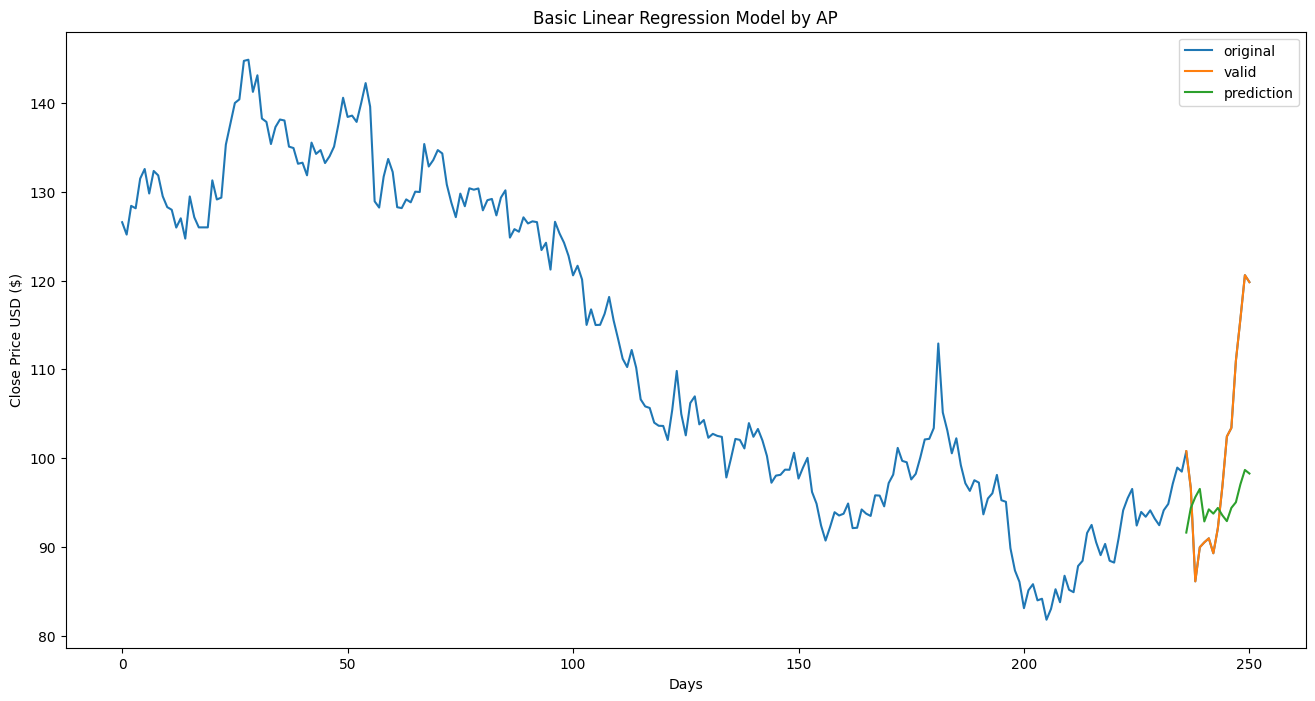

In [16]:
predictions = lr_prediction

valid = df_close_price[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title('Basic Linear Regression Model by AP')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')

plt.plot(amzn_df['Close_price'])
plt.plot(valid[['Close_price', 'Prediction']])
plt.legend(['original','valid','prediction'])
plt.show()

In [14]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(valid['Close_price'], valid['Prediction']))
rmse

11.516041039068071